# Content and Objective

+ Showing results of fading on ber
+ Method: BPSK is transmitted over awgn and fading channel; several trials are simulated for estimating error probability

In [1]:
# importing
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
#plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 12) )

# Parameters

In [3]:
# max. numbers of errors and/or symbols
max_errors = int( 1e2 )
max_syms = int( 1e5 )

# Eb/N0
EbN0_db_min = 0
EbN0_db_max = 30
EbN0_db_step = 3

# initialize Eb/N0 array
EbN0_db_range = np.arange( EbN0_db_min, EbN0_db_max, EbN0_db_step )
EbN0_range = 10**( EbN0_db_range / 10 )

# constellation points
constellation = [-1, 1]     


# Simulation

In [5]:
###
# initialize BER  arrays 

# theoretical ber for bpsk as on slides
ber_bpsk = np.zeros_like( EbN0_db_range, dtype=float )     
ber_bpsk_theo = 1 - stats.norm.cdf( np.sqrt( 2 * EbN0_range ) )
    
# ber in fading channel    
ber_fading = np.zeros_like( EbN0_db_range, dtype=float ) 
ber_fading_theo = 1 / ( 4 * 10**(EbN0_db_range / 10 ) )

# ber when applying channel inversion
ber_inverted = np.zeros_like( EbN0_db_range, dtype=float )  


###
# loop for snr
for ind_snr, val_snr in enumerate( EbN0_range ):

    # initialize error counter
    num_errors_bpsk = 0
    num_errors_fading = 0
    num_errors_inverted = 0
    
    num_syms = 0

    # get noise variance
    sigma2 = 1. / ( val_snr )  

    # loop for errors
    while ( num_errors_bpsk < max_errors and num_syms < max_syms ):

        # generate data and modulate by look-up
        d = np.random.randint( 0, 2)
        s = constellation[ d ] 

        # generate noise
        noise = np.sqrt( sigma2 / 2 ) * ( np.random.randn() + 1j * np.random.randn() )
        
        
        ###
        # apply different channels
        
        # bpsk without fading
        r_bpsk = s + noise            
        
        # bpsk with slow flat fading
        h = 1/np.sqrt(2) * ( np.random.randn() + 1j * np.random.randn() )
        r_flat = h * s + noise

        
        ### receiver
        # matched filter and inverting channel
        
        # mf and channel inversion
        y_mf = np.conjugate( h / np.abs(h) )* r_flat        
        y_inv = r_flat / h
        
        # demodulate symbols
        d_est_bpsk = int( np.real( r_bpsk ) > 0 )        
        d_est_flat = int( np.real( y_mf ) > 0 )
        d_est_inv = int( np.real( y_inv ) > 0 )
        
        
        ###
        # count errors
        num_errors_bpsk += int( d_est_bpsk != d )
        num_errors_fading += int( d_est_flat != d )
        num_errors_inverted += int( d_est_inv != d )

        # increase counter for symbols
        num_syms += 1


    # ber by relative amount of errors
    ber_bpsk[ ind_snr ] = num_errors_bpsk / num_syms
    ber_fading[ ind_snr ] = num_errors_fading / ( num_syms * 1.0 )   
    ber_inverted[ ind_snr ] = num_errors_inverted / ( num_syms * 1.0 )
    
    # show progress if you like to
    #print('Eb/N0 planned (dB) = {:2.1f}\n'.format( 10*np.log10(val_snr) ) )

# Plotting

Text(0, 0.5, 'BER')

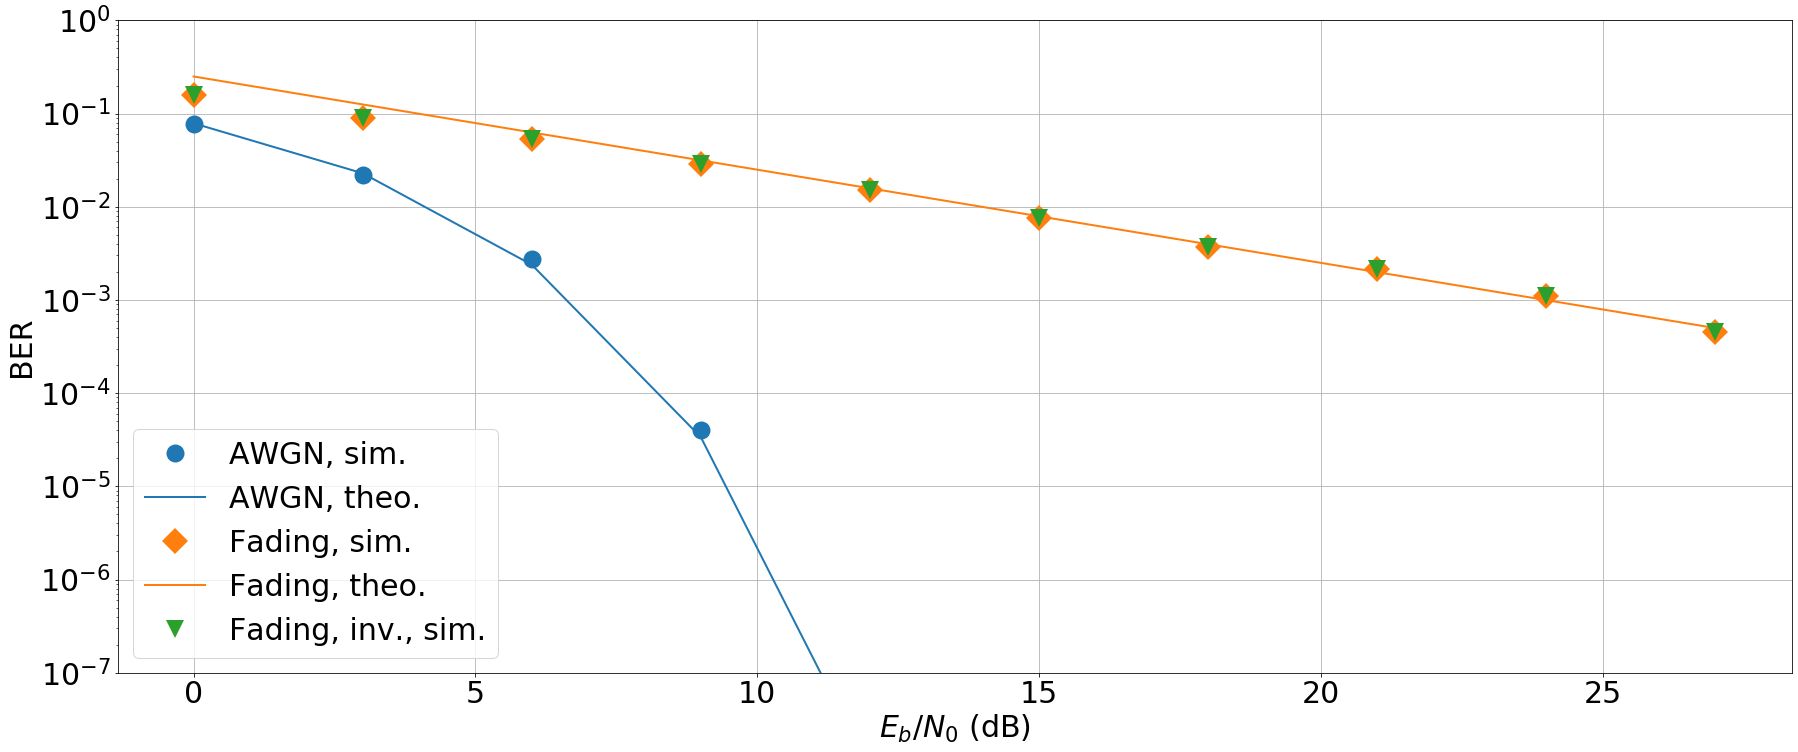

In [6]:
# plot bpsk results using identical colors for theory and simulation
ax_sim = plt.plot( EbN0_db_range, ber_bpsk, marker = 'o', mew=4, ms=18, markeredgecolor = 'none', linestyle='None', label='AWGN, sim.' )            
color_sim = ax_sim[0].get_color()     
plt.plot(EbN0_db_range, ber_bpsk_theo, linewidth = 2.0, color = color_sim, label='AWGN, theo.')  


# plot slow flat results using identical colors for theory and simulation
ax_sim = plt.plot( EbN0_db_range, ber_fading , marker = 'D', mew=4, ms=18, markeredgecolor = 'none', linestyle='None', label = 'Fading, sim.' )
color_sim = ax_sim[0].get_color()     
plt.plot(EbN0_db_range, ber_fading_theo, linewidth = 2.0, color = color_sim, label='Fading, theo.')  


# plot ber when using channel inversion
ax_sim = plt.plot( EbN0_db_range, ber_inverted , marker = 'v', mew=4, ms=18, markeredgecolor = 'none', linestyle='None', label = 'Fading, inv., sim.' )

plt.yscale('log')
plt.grid(True)
plt.legend(loc='lower left') 

plt.ylim( (1e-7, 1) )

plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('BER')

### Discussion:

+ **Note:** Channel inversion ($r/h$) yields the same results as matched filtering ($h^*\cdot r$). 

+ **Question:** Can you reason why?